# PE Histograms

In [2]:
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [23]:
# Load xvg 300
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week5/Inputs/T300/adp_T300.xvg'
T300_en = np.genfromtxt(file_path, skip_header=24)

In [24]:
# Load xvg 363
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week5/Inputs/T363/adp_T363.xvg'
T363_en = np.genfromtxt(file_path, skip_header=24)

In [25]:
# Load xvg 440
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week5/Inputs/T440/adp_T440.xvg'
T440_en = np.genfromtxt(file_path, skip_header=24)

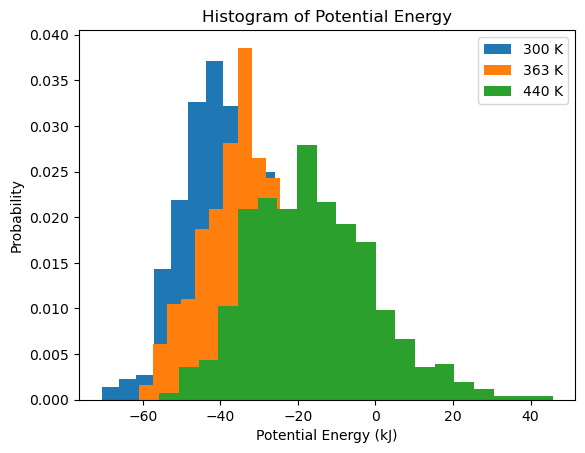

In [26]:
# Histogram for T300
plt.title('Histogram of Potential Energy')
plt.xlabel('Potential Energy (kJ)')
plt.ylabel('Probability')
plt.hist(T300_en[:,1], bins=20, density=True)
plt.hist(T363_en[:,1], bins=20, density=True)
plt.hist(T440_en[:,1], bins=20, density=True)
plt.legend(['300 K', '363 K', '440 K'])
plt.show()

# FES for Alanine w/ Replica Exchange

In [2]:
# Load trajectory
traj_300 = md.load_trr('/home/tje3676/chem-class-2023/comp-lab-class/Week5/Inputs/T300/adp_exchange3temps.trr', top='/home/tje3676/chem-class-2023/comp-lab-class/Week5/Inputs/T300/adp_exchange3temps.gro')

In [3]:
phi = md.compute_phi(traj_300)
psi = md.compute_psi(traj_300)

In [30]:
# Plot histogram of phi and psi
hist, x_edge, y_edge = np.histogram2d(
    phi[1].ravel(),
    psi[1].ravel(),
    bins=[20,20],
    range=[[-np.pi, np.pi], [-np.pi, np.pi]])

# Get FES

hist = - (300 * constants.Boltzmann) * np.log(hist)
hist = hist - np.min(hist)

/tmp/ipykernel_43286/2149657031.py:10: RuntimeWarning: divide by zero encountered in log
  hist = - (300 * constants.Boltzmann) * np.log(hist)


<function matplotlib.pyplot.show(close=None, block=None)>

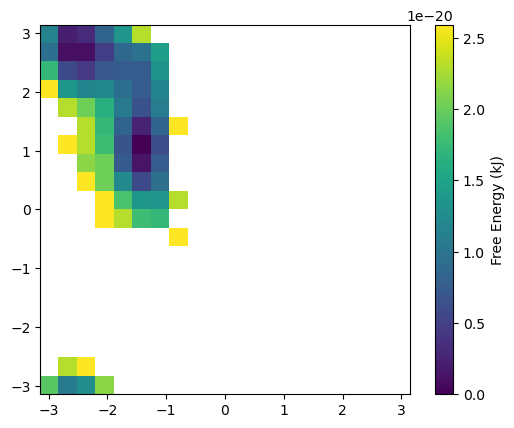

In [31]:
plt.imshow(hist.T, extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], origin='lower', cmap='viridis')
plt.colorbar(label='Free Energy (kJ)')
plt.show

# Replica in Temp

In [3]:
# Load xvg index
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week5/Inputs/T300/replica_index.xvg'
r_index = np.genfromtxt(file_path, skip_header=24)

In [4]:
# Load xvg temp
file_path = '/home/tje3676/comp-lab-class/comp-lab-class/Week5/Inputs/T300/replica_temp.xvg'
r_temp = np.genfromtxt(file_path, skip_header=24)

(0.0, 50.0)

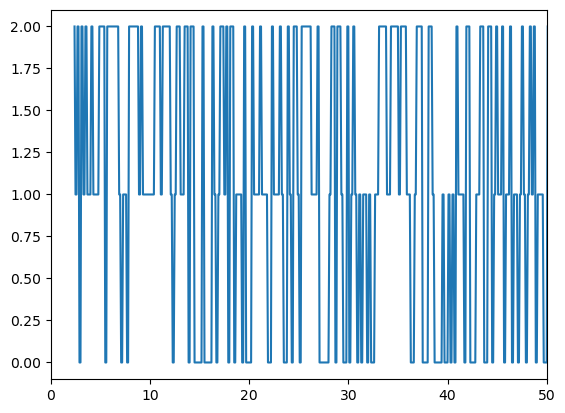

In [5]:
plt.plot(r_index[:,0], r_index[:,1])
plt.xlim(0,50)